In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python

import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trig etc.
import random

In [2]:
# Setting directory
os.chdir("/Users/wnguyen/Dropbox/CR") # set the working directory

In [25]:
# Importing data
data_url = 'https://raw.githubusercontent.com/wdnguyen/CR/master/CostaRica_Chemistry_20200518.csv'

# Read data from url as pandas dataframe
df = pd.read_csv(data_url)

# Filtering endmembers
df_rain = df[df['Site'] == "Rain"] # Endmember 1 = Rain
df_soil = df[df['Site'] == "Soil"] # Endmember 2 = Soil
df_spring = df[df['Site'] == "Spring"] # Endmember 3a = Spring
df_us = df[df['Site'] == "Upstream"] # Endmember 3b = Upstream

# Filtering mixing batches
df_ds = df[df['Site'] == "Downstream"] # Mixing batch a
df_stream = df[df['Source'] == "Stream"] # Mixing batch b

### Summary statistics:
df_summary = df.groupby("Site").describe()
df_summary

Temp                                                         \
           count       mean       std   min     25%    50%    75%   max   
Site                                                                      
Downstream  27.0  22.218519  0.443792  21.8  22.000  22.00  22.30  23.5   
Rain         7.0  24.414286  0.893362  23.4  23.850  24.30  24.75  26.0   
Soil        16.0  22.993750  0.539714  22.2  22.575  22.95  23.35  24.2   
Spring       8.0  23.137500  0.606954  22.3  22.675  23.15  23.45  24.0   
Upstream    24.0  21.875000  0.053161  21.8  21.800  21.90  21.90  22.0   

           SPCOND              ...     O18           D                       \
            count        mean  ...     75%   max count       mean       std   
Site                           ...                                            
Downstream   27.0  114.044444  ... -4.5400 -3.55  23.0 -25.295652  3.142159   
Rain          7.0   15.857143  ... -2.6325 -2.44   2.0 -11.400000  1.131371   
Soil         16.0   92.450000  ... -4.9300 -4.68   6.0 -26.283333  0.904249   
Spring        8.0   91.562500  ... -5.1675 -5.11   2.0 -26.650000  1.626346   
Upstream     24.0  115.920833  ... -4.7200 -3.66  25.0 -24.404000  2.450762   

                                               
             min     25%    50%     75%   max  
Site                                           
Downstream -38.3 -25.250 -24.60 -23.800 -22.8  
Rain       -12.2 -11.800 -11.40 -11.000 -10.6  
Soil       -27.1 -27.050 -26.55 -25.525 -25.1  
Spring     -27.8 -27.225 -26.65 -26.075 -25.5  
Upstream   -32.3 -25.200 -23.90 -23.500 -18.2  

[5 rows x 400 columns]

In [35]:
df_us

,ID,SamplingDate,Chemetrics_Acidified_Date,Site,Source,Temp,SPCOND,pH,ORP,AlkalinityS,...,B,Sr,Sr2,Ba,K,As,Na,Mg,O18,D
11,US1,7/6/18 17:52,7/6/18 17:52,Upstream,Stream,22.0,113.4,6.1,307.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.85,-25.2
13,US2,7/6/18 19:39,7/6/18 19:39,Upstream,Stream,21.9,118.0,7.0,350.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.73,-23.8
14,US3,7/6/18 21:45,7/6/18 21:45,Upstream,Stream,21.9,119.6,7.0,338.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.14,-24.9
15,US4,7/6/18 23:40,7/6/18 23:40,Upstream,Stream,21.9,115.0,7.1,354.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.83,-22.4
16,US5,7/7/18 1:38,7/7/18 1:38,Upstream,Stream,21.9,110.2,7.1,359.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.84,-22.9
17,US6,7/7/18 3:53,7/7/18 3:53,Upstream,Stream,21.9,116.7,7.1,363.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.72,-23.8
18,US7,7/7/18 5:35,7/7/18 5:35,Upstream,Stream,21.9,116.8,7.1,365.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.45,-23.5
19,US8,7/7/18 7:53,7/7/18 7:53,Upstream,Stream,21.9,116.8,7.1,367.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.64,-22.5
21,US9,7/7/18 11:00,7/7/18 11:00,Upstream,Stream,21.9,115.1,7.1,365.2,NaN,...,78.69,219.72,NaN,NaN,5.59,0.69,10.83,5.98,-4.84,-23.4
22,US10,NaN,7/7/18 13:40,Upstream,Stream,NaN,NaN,NaN,NaN,NaN,...,102.94,221.34,NaN,NaN,5.57,0.66,11.09,6.02,-4.78,-22.7


In [3]:
#SO4 and Cl
# Endmembers: up, rain, soil
# Mixing: down
# up endmember is moving with mixing batch down # assume no error for now
# applying normal distribution to rain and soil endmembers

# 1 = SO4
# 2 = Cl

rain_1_mean = df_summary['SO4']['mean']['Rain']; rain_1_stdev = df_summary['SO4']['std']['Rain'] # Gaussian mean and standard deviation for rain endmember
rain_2_mean = df_summary['Cl']['mean']['Rain']; rain_2_stdev = df_summary['Cl']['std']['Rain'] # Gaussian mean and standard deviation for rain endmember
soil_1_mean = df_summary['SO4']['mean']['Soil']; soil_1_stdev = df_summary['SO4']['std']['Soil'] # Gaussian mean and standard deviation for soil endmember
soil_2_mean = df_summary['Cl']['std']['Soil']; soil_2_stdev = df_summary['Cl']['std']['Soil'] # Gaussian mean and standard deviation for soil endmember
L = 1000 # Number of MCS realizations

# Stdev of rain Cl will be negative sometimes...make sure to correct for that later

In [4]:
# Apply normal distribution to draw L realizations for each variable and storing them in ndarrays
rain_1 = np.random.normal(rain_1_mean, rain_1_stdev, size = L)
rain_2 = np.random.normal(rain_2_mean, rain_2_stdev, size = L)
soil_1 = np.random.normal(soil_1_mean, soil_1_stdev, size = L)
soil_2 = np.random.normal(soil_2_mean, soil_2_stdev, size = L)

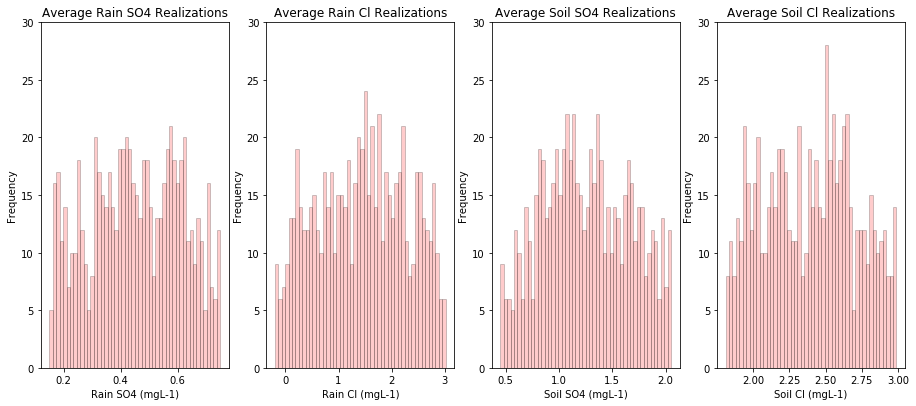

In [5]:
# Plotting distribution of the realizations fr each variable
rain_1_min = rain_1_mean - rain_1_stdev; rain_1_max = rain_1_mean + rain_1_stdev            # average porosity min and max
rain_2_min = rain_2_mean - rain_2_stdev; rain_2_max = rain_2_mean + rain_2_stdev
soil_1_min = soil_1_mean - soil_1_stdev; soil_1_max = soil_1_mean + soil_1_stdev
soil_2_min = soil_2_mean - soil_2_stdev; soil_2_max = soil_2_mean + soil_2_stdev 

plt.subplot(141)
GSLIB.hist_st(rain_1,rain_1_min,rain_1_max,log=False,cumul=False,bins=50,weights=None,xlabel="Rain SO4 (mgL-1)",title="Average Rain SO4 Realizations")
plt.ylim(0.0,30)

plt.subplot(142)
GSLIB.hist_st(rain_2,rain_2_min,rain_2_max,log=False,cumul=False,bins=50,weights=None,xlabel="Rain Cl (mgL-1)",title="Average Rain Cl Realizations")
plt.ylim(0.0,30)

plt.subplot(143)
GSLIB.hist_st(soil_1,soil_1_min,soil_1_max,log=False,cumul=False,bins=50,weights=None,xlabel="Soil SO4 (mgL-1)",title="Average Soil SO4 Realizations")
plt.ylim(0.0,30)

plt.subplot(144)
GSLIB.hist_st(soil_2,soil_2_min,soil_2_max,log=False,cumul=False,bins=50,weights=None,xlabel="Soil Cl (mgL-1)",title="Average Soil Cl Realizations")
plt.ylim(0.0,30)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [11]:
up_1 = np.repeat(0.9284, L)
up_2 = np.repeat(2.2664, L)
down_1 = np.repeat(1.1921, L)
down_2 = np.repeat(2.2138, L)
ones = np.repeat(1, L)

In [12]:
# Linear equations:
# up_f = (down_1 - soil_1 - rain_f(rain_1 - soil_1))/(up_1 - soil_1)
# soil_f = (down_2 - up_2 - rain_f(rain_2 - up_2))/(soil_2 - up_1)
# rain_f = 1 - up_f - soil_f

In [13]:
results = []
for x in range(0, L):
    a = np.array([[up_1[x], soil_1[x], rain_1[x]], [up_2[x], soil_2[x], rain_2[x]], [ones[x], ones[x], ones[x]]])
    b = np.array([down_1[x], down_2[x], ones[x]])
    results.append(np.linalg.solve(a,b))

# np.hstack(results)

In [14]:
up_f = []
soil_f = []
rain_f = []
for x in range(0,L):
    up_f.append(results[x][0])
    soil_f.append(results[x][1])
    rain_f.append(results[x][2])

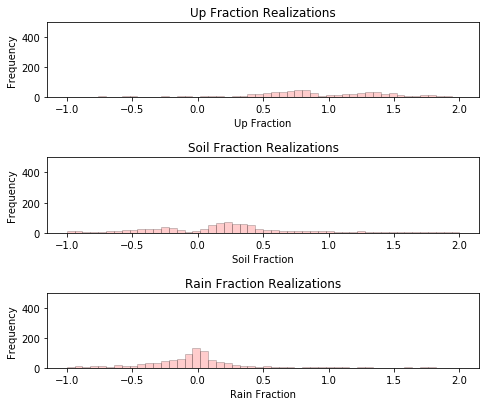

In [15]:
plt.subplot(311)
GSLIB.hist_st(up_f,-1,2,log=False,cumul=False,bins=50,weights=None,xlabel="Up Fraction",title="Up Fraction Realizations")
plt.ylim(0.0,500)

plt.subplot(312)
GSLIB.hist_st(soil_f,-1,2,log=False,cumul=False,bins=50,weights=None,xlabel="Soil Fraction",title="Soil Fraction Realizations")
plt.ylim(0.0,500)

plt.subplot(313)
GSLIB.hist_st(rain_f,-1,2,log=False,cumul=False,bins=50,weights=None,xlabel="Rain Fraction",title="Rain Fraction Realizations")
plt.ylim(0.0,500)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.8)
plt.show()